In [1]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Script that adds product customer IDs representing each unique product customer pair 
# to both the train data and the test data and then compares them for differntiating
# customer product pairs between the train and test data

test = pd.read_csv('Input/test.csv')
test['Id'] = test['User_ID'].astype(str) + '_' + test['Product_ID'].astype(str)
test = test.sort_values('Id')
testA = test['User_ID'].unique()

train = pd.read_csv('Input/train.csv') 
train['Id'] = train['User_ID'].astype(str) + '_' + train['Product_ID'].astype(str)
train = train.sort_values('Id')
trainA = train['User_ID'].unique()


users_in_both = []
users_in_both2 = []

users_in_test_only = []
users_in_train_only = []

for user in trainA:
    if user in test:
        users_in_both.append(user)
    
    else:
        users_in_train_only.append(user)
        
print(len(users_in_both))    
print(len(users_in_train_only))   

for user in testA:
    if user in trainA:
        users_in_both2.append(user)
    
    else:
        users_in_test_only.append(user)
        
  

print(len(users_in_both2))    
print(len(users_in_test_only))   

# The train and test file have identical customer product pairs
# The implication of this is that I will not need to predict for
# new product custumoer pairs

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

0
5891
5891
0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 116851 to 506596
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 54.6+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233599 entries, 148223 to 229735
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 21.4+ MB


In [5]:
# Fill the Nan values in columns Product_Category_2 and Product_Category_3
# With 0's instead of Nans
train.fillna(0, axis=1, inplace=True)
test.fillna(0, axis=1, inplace=True)

# Hot One Encoding Categorical Data

## Hot One Encoding Gender

In [6]:
# Define an array containing gender column data from train
gender = np.array(train['Gender']) 

# integer encode the gender data from the gender array
label_encoder = LabelEncoder()
gender_integer_encoded = label_encoder.fit_transform(gender)
print(gender_integer_encoded)

# binary encode the gender data from the integer encoded data
onehot_encoder = OneHotEncoder(sparse=False)
gender_integer_encoded = gender_integer_encoded.reshape(len(gender_integer_encoded), 1)
gender_onehot_encoded = onehot_encoder.fit_transform(gender_integer_encoded)
print(gender_onehot_encoded)
print(type(gender_onehot_encoded))

# Converts the hot one encoded data into a dataframe with columns 'F' for female and 'M' for male
trainGender = pd.DataFrame(data=gender_onehot_encoded, columns=['F','M'])
#print(trainGender)

[0 0 0 ..., 1 1 1]
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
<class 'numpy.ndarray'>


In [7]:
# Test
# Define an array containing gender column data from test
gender = np.array(test['Gender']) 

# integer encode the gender data from the gender array
label_encoder = LabelEncoder()
gender_integer_encoded = label_encoder.fit_transform(gender)
print(gender_integer_encoded)

# binary encode the gender data from the integer encoded data
onehot_encoder = OneHotEncoder(sparse=False)
gender_integer_encoded = gender_integer_encoded.reshape(len(gender_integer_encoded), 1)
gender_onehot_encoded = onehot_encoder.fit_transform(gender_integer_encoded)
print(gender_onehot_encoded)
print(type(gender_onehot_encoded))

# Converts the hot one encoded data into a dataframe with columns 'F' for female and 'M' for male
testGender = pd.DataFrame(data=gender_onehot_encoded, columns=['F','M'])
#print(testGender)

[0 0 0 ..., 1 1 1]
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
<class 'numpy.ndarray'>


## Hot One Encoding Age

In [8]:
# Train
# Define an array containing age column data from train
ageArray = np.array(train['Age'])

# integer encode the gender data from the age array
label_encoder = LabelEncoder()
age_integer_encoded = label_encoder.fit_transform(ageArray)
print(age_integer_encoded)

# binary encode the age data from the integer encoded data
onehot_encoder = OneHotEncoder(sparse=False)
age_integer_encoded = age_integer_encoded.reshape(len(age_integer_encoded), 1)
age_onehot_encoded = onehot_encoder.fit_transform(age_integer_encoded)
print(age_onehot_encoded)

#Creates a set of column titles based on the age range categories
ageColumns = set(train['Age'])
ageColumns = list(ageColumns)
ageColumns.sort()
print(ageColumns)

# Converts the hot one encoded data into a dataframe with columns created in previous row
trainAge = pd.DataFrame(data=age_onehot_encoded, columns=ageColumns)
#print(trainAge)

[0 0 0 ..., 2 2 2]
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


In [9]:
# test
# Define an array containing age column data from test
ageArray = np.array(test['Age'])

# integer encode the gender data from the age array
label_encoder = LabelEncoder()
age_integer_encoded = label_encoder.fit_transform(ageArray)
print(age_integer_encoded)

# binary encode the age data from the integer encoded data
onehot_encoder = OneHotEncoder(sparse=False)
age_integer_encoded = age_integer_encoded.reshape(len(age_integer_encoded), 1)
age_onehot_encoded = onehot_encoder.fit_transform(age_integer_encoded)
print(age_onehot_encoded)

#Creates a set of column titles based on the age range categories
ageColumns = set(test['Age'])
ageColumns = list(ageColumns)
ageColumns.sort()
print(ageColumns)

# Converts the hot one encoded data into a dataframe with columns created in previous row
testAge = pd.DataFrame(data=age_onehot_encoded, columns=ageColumns)
#print(testAge)

[0 0 0 ..., 2 2 2]
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


## Hot One Encoding Occupation

In [10]:
#Checking if 0 should be removed as a category
for i in range(0, 19):
    print ("Occupation: ", i, " has", train[train['Occupation']==i]['Occupation'].count(),'people in the cateogry of job.')
    

Occupation:  0  has 69638 people in the cateogry of job.
Occupation:  1  has 47426 people in the cateogry of job.
Occupation:  2  has 26588 people in the cateogry of job.
Occupation:  3  has 17650 people in the cateogry of job.
Occupation:  4  has 72308 people in the cateogry of job.
Occupation:  5  has 12177 people in the cateogry of job.
Occupation:  6  has 20355 people in the cateogry of job.
Occupation:  7  has 59133 people in the cateogry of job.
Occupation:  8  has 1546 people in the cateogry of job.
Occupation:  9  has 6291 people in the cateogry of job.
Occupation:  10  has 12930 people in the cateogry of job.
Occupation:  11  has 11586 people in the cateogry of job.
Occupation:  12  has 31179 people in the cateogry of job.
Occupation:  13  has 7728 people in the cateogry of job.
Occupation:  14  has 27309 people in the cateogry of job.
Occupation:  15  has 12165 people in the cateogry of job.
Occupation:  16  has 25371 people in the cateogry of job.
Occupation:  17  has 40043 

In [11]:
# Define an array containing occupation column data from train
occupationArray = np.array(train['Occupation'])
print(occupationArray.max())
print(occupationArray.min())

# binary encode the occupation data directly because its raw form was integer encoded
onehot_encoder = OneHotEncoder(sparse=False)
occupation_integer_encoded = occupationArray.reshape(len(occupationArray), 1)
occupation_onehot_encoded = onehot_encoder.fit_transform(occupation_integer_encoded)
print(occupation_onehot_encoded)

#Creates a set of column titles based on the occupation categories
occupationColumns = set(train['Occupation'])
occupationColumns = list(occupationColumns)
occupationColumns.sort()
hold = []
for item in occupationColumns:
    temp = str(item) + '_Occupation'
    hold.append(temp)

print(type(hold))
print(hold)

# Converts the hot one encoded data into a dataframe with columns created in previous row
trainOccupation = pd.DataFrame(data=occupation_onehot_encoded, columns= hold)
#print(trainOccupation)

20
0
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
<class 'list'>
['0_Occupation', '1_Occupation', '2_Occupation', '3_Occupation', '4_Occupation', '5_Occupation', '6_Occupation', '7_Occupation', '8_Occupation', '9_Occupation', '10_Occupation', '11_Occupation', '12_Occupation', '13_Occupation', '14_Occupation', '15_Occupation', '16_Occupation', '17_Occupation', '18_Occupation', '19_Occupation', '20_Occupation']


In [12]:
# Define an array containing occupation column data from test
occupationArray = np.array(test['Occupation'])
print(occupationArray.max())
print(occupationArray.min())

# binary encode the occupation data directly because its raw form was integer encoded
onehot_encoder = OneHotEncoder(sparse=False)
occupation_integer_encoded = occupationArray.reshape(len(occupationArray), 1)
occupation_onehot_encoded = onehot_encoder.fit_transform(occupation_integer_encoded)
print(occupation_onehot_encoded)

#Creates a set of column titles based on the occupation categories
occupationColumns = set(test['Occupation'])
occupationColumns = list(occupationColumns)
occupationColumns.sort()
hold = []
for item in occupationColumns:
    temp = str(item) + '_Occupation'
    hold.append(temp)

print(type(hold))
print(hold)

# Converts the hot one encoded data into a dataframe with columns created in previous row
testOccupation = pd.DataFrame(data=occupation_onehot_encoded, columns= hold)
#print(testOccupation)

20
0
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
<class 'list'>
['0_Occupation', '1_Occupation', '2_Occupation', '3_Occupation', '4_Occupation', '5_Occupation', '6_Occupation', '7_Occupation', '8_Occupation', '9_Occupation', '10_Occupation', '11_Occupation', '12_Occupation', '13_Occupation', '14_Occupation', '15_Occupation', '16_Occupation', '17_Occupation', '18_Occupation', '19_Occupation', '20_Occupation']


## Hot One Encoding City Category

In [13]:
# Define an array containing city category column data from train
city_catArray = np.array(train['City_Category'])

# integer encode the city category data
label_encoder = LabelEncoder()
city_cat_integer_encoded = label_encoder.fit_transform(city_catArray)
print(city_cat_integer_encoded)

# binary encode the integer encoded data from previous step
city_cat_onehot_encoder = OneHotEncoder(sparse=False)
city_cat_integer_encoded = city_cat_integer_encoded.reshape(len(city_cat_integer_encoded), 1)
city_cat_onehot_encoded = onehot_encoder.fit_transform(city_cat_integer_encoded)
print(city_cat_onehot_encoded)

# creates column names for the city categories
City_Cat_Columns = set(train['City_Category'])
City_Cat_Columns = list(City_Cat_Columns)
City_Cat_Columns.sort()
print(City_Cat_Columns)

# creates a data frame out of the one hot encoded data with column titles created in previous step
trainCityCat = pd.DataFrame(data=city_cat_onehot_encoded, columns=City_Cat_Columns)
#print(trainCityCat)

[0 0 0 ..., 1 1 1]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 ..., 
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]]
['A', 'B', 'C']


In [14]:
# Define an array containing city category column data from test
city_catArray = np.array(test['City_Category'])

# integer encode the city category data
label_encoder = LabelEncoder()
city_cat_integer_encoded = label_encoder.fit_transform(city_catArray)
print(city_cat_integer_encoded)

# binary encode the integer encoded data from previous step
city_cat_onehot_encoder = OneHotEncoder(sparse=False)
city_cat_integer_encoded = city_cat_integer_encoded.reshape(len(city_cat_integer_encoded), 1)
city_cat_onehot_encoded = onehot_encoder.fit_transform(city_cat_integer_encoded)
print(city_cat_onehot_encoded)

# creates column names for the city categories
City_Cat_Columns = set(test['City_Category'])
City_Cat_Columns = list(City_Cat_Columns)
City_Cat_Columns.sort()
print(City_Cat_Columns)

# creates a data frame out of the one hot encoded data with column titles created in previous step
testCityCat = pd.DataFrame(data=city_cat_onehot_encoded, columns=City_Cat_Columns)
#print(testCityCat)

[0 0 0 ..., 1 1 1]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 ..., 
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]]
['A', 'B', 'C']


### Hot One Encoding Stay in Current City Years

In [15]:
# Define an array containing stay in current city years column data from train
stay_yearsArray = np.array(train['Stay_In_Current_City_Years'])

# integer encode the data
label_encoder = LabelEncoder()
stay_years_integer_encoded = label_encoder.fit_transform(stay_yearsArray)
print(stay_years_integer_encoded)

# binary encode the integer encoded data from previous step
stay_years_onehot_encoder = OneHotEncoder(sparse=False)
stay_years_integer_encoded = stay_years_integer_encoded.reshape(len(stay_years_integer_encoded), 1)
stay_years_onehot_encoded = onehot_encoder.fit_transform(stay_years_integer_encoded)
print(stay_years_onehot_encoded)

# creates column names for the categories
stay_years_Columns = set(train['Stay_In_Current_City_Years'])
stay_years_Columns = list(stay_years_Columns)
stay_years_Columns.sort()
print(stay_years_Columns)

# creates a data frame out of the one hot encoded data with column titles created in previous step
trainStayYears = pd.DataFrame(data=stay_years_onehot_encoded, columns=stay_years_Columns)
#print(trainStayYears)

[2 2 2 ..., 2 2 2]
[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 ..., 
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]]
['0', '1', '2', '3', '4+']


In [16]:
# Define an array containing stay in current city years column data from test
stay_yearsArray = np.array(test['Stay_In_Current_City_Years'])

# integer encode the data
label_encoder = LabelEncoder()
stay_years_integer_encoded = label_encoder.fit_transform(stay_yearsArray)
print(stay_years_integer_encoded)

# binary encode the integer encoded data from previous step
stay_years_onehot_encoder = OneHotEncoder(sparse=False)
stay_years_integer_encoded = stay_years_integer_encoded.reshape(len(stay_years_integer_encoded), 1)
stay_years_onehot_encoded = onehot_encoder.fit_transform(stay_years_integer_encoded)
print(stay_years_onehot_encoded)

# creates column names for the categories
stay_years_Columns = set(test['Stay_In_Current_City_Years'])
stay_years_Columns = list(stay_years_Columns)
stay_years_Columns.sort()
print(stay_years_Columns)

# creates a data frame out of the one hot encoded data with column titles created in previous step
testStayYears = pd.DataFrame(data=stay_years_onehot_encoded, columns=stay_years_Columns)
#print(testStayYears)

[2 2 2 ..., 2 2 2]
[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 ..., 
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]]
['0', '1', '2', '3', '4+']


# Merging Data Frames of One Hot Encoded Data

In [17]:
# creates a single dataframe with the original data frame and all of the hot one encoded data concatenated
train2 = pd.concat([train, trainGender, trainAge, trainOccupation, trainCityCat, trainStayYears], axis=1, join='inner')

In [18]:
# creates a single dataframe with the original data frame and all of the hot one encoded data concatenated
test2 = pd.concat([test, testGender, testAge, testOccupation, testCityCat, testStayYears], axis=1, join='inner')

# Hot One Encoding Product Category Data

In [19]:
# Convert product category column data types from float to int
train2.Product_Category_1 = train2.Product_Category_1.astype(int)
train2.Product_Category_2 = train2.Product_Category_2.astype(int)
train2.Product_Category_3 = train2.Product_Category_3.astype(int)

# Creates three empty arrays with equivalent rows as the data frame and 
# Eighteen columns to represent each category of product 
x = []
Product_Category_List = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
for i in range(3):
    temp = np.zeros((550068, 20))
    x.append(temp)
    
# Iterates over each entry in the product category column x and 
# Sets the corresponding entry in the empty array to a 1
y = []

for product_cat, array in zip(Product_Category_List, x):
    print(product_cat)
    for index, entry in enumerate(train2[product_cat][:]):
        #print(str(index) + ": " + str(entry))
        if entry == 0:
            continue
            
        else:
            array[index, (entry-1)] = 1 
            #print(entry, product_cat)
            
    y.append(array)
    
# Testing values got updated correctly
print(y[1][0:5,:])

# Sums three arrays together to create a single array containing all product category data hot one encoded 
# Converts array to dataframe 
z = sum(y)
z = pd.DataFrame(z)

# Generates map of new names for occupation data based on old names
newNamesZ = []
for i in range(1, 21):
    temp = str(i) + '_Product_Category'
    newNamesZ.append(temp)
   
oldNamesZ = range(1,21)
dictionary = dict(zip(oldNamesZ, newNamesZ))

print(dictionary)

# Renames column names based on the dictionary created in previous step
z = z.rename(columns={0: '1_Product_Category', 1: '2_Product_Category', 2: '3_Product_Category', 3: '4_Product_Category', 4: '5_Product_Category', 5: '6_Product_Category', 6: '7_Product_Category', 7: '8_Product_Category', 8: '9_Product_Category', 9: '10_Product_Category', 10: '11_Product_Category', 11: '12_Product_Category', 12: '13_Product_Category', 13: '14_Product_Category', 14: '15_Product_Category', 15: '16_Product_Category', 16: '17_Product_Category', 17: '18_Product_Category', 18: '19_Product_Category', 19: '20_Product_Category'})
print(z)

# Combines product data from previous step to trainDf data frame
train2 = pd.concat([train2, z], axis=1, join='inner')

# Renames all other column names with more accurate/description name
train2 = train2.rename(columns={'Purchase':'Purchase_Amount', 'F': 'Female', 'M': 'Male', '0-17': 'Age_0-17', '18-25': 'Age_18-25', '26-35': 'Age_26-35', '36-45': 'Age_36-45', '46-50': 'Age_46-50', '51-55': 'Age_51-55', '55+':'Age_55+', 'A':'City_Category_A', 'B': 'City_Category_B', 'C':'City_Category_C', '0':'Stay_0yr', '1':'Stay_1yr', '2': 'Stay_2yr', '3': 'Stay_3yr', '4+': 'Stay4+yr'})

Product_Category_1
Product_Category_2
Product_Category_3
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]
{1: '1_Product_Category', 2: '2_Product_Category', 3: '3_Product_Category', 4: '4_Product_Category', 5: '5_Product_Category', 6: '6_Product_Category', 7: '7_Product_Category', 8: '8_Product_Category', 9: '9_Product_Category', 10: '10_Product_Category', 11: '11_Product_Category', 12: '12_Product_Category', 13: '13_Product_Category', 14: '14_Product_Category', 15: '15_Product_Category', 16: '16_Product_Category', 17: '17_Product_Category', 18: '18_Product_Category', 19: '19_Product_Category', 20: '20_Product_Categ

In [20]:
# Convert product category column data types from float to int
test2.Product_Category_1 = test2.Product_Category_1.astype(int)
test2.Product_Category_2 = test2.Product_Category_2.astype(int)
test2.Product_Category_3 = test2.Product_Category_3.astype(int)

# Creates three empty arrays with equivalent rows as the data frame and 
# Eighteen columns to represent each category of product 
x = []
Product_Category_List = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
for i in range(3):
    temp = np.zeros((550068, 20))
    x.append(temp)
    
# Iterates over each entry in the product category column x and 
# Sets the corresponding entry in the empty array to a 1
y = []

for product_cat, array in zip(Product_Category_List, x):
    print(product_cat)
    for index, entry in enumerate(test2[product_cat][:]):
        #print(str(index) + ": " + str(entry))
        if entry == 0:
            continue
            
        else:
            array[index, (entry-1)] = 1 
            #print(entry, product_cat)
            
    y.append(array)
    
# Testing values got updated correctly
print(y[1][0:5,:])

# Sums three arrays together to create a single array containing all product category data hot one encoded 
# Converts array to dataframe 
z = sum(y)
z = pd.DataFrame(z)

# Generates map of new names for occupation data based on old names
newNamesZ = []
for i in range(1, 21):
    temp = str(i) + '_Product_Category'
    newNamesZ.append(temp)
   
oldNamesZ = range(1,21)
dictionary = dict(zip(oldNamesZ, newNamesZ))

print(dictionary)

# Renames column names based on the dictionary created in previous step
z = z.rename(columns={0: '1_Product_Category', 1: '2_Product_Category', 2: '3_Product_Category', 3: '4_Product_Category', 4: '5_Product_Category', 5: '6_Product_Category', 6: '7_Product_Category', 7: '8_Product_Category', 8: '9_Product_Category', 9: '10_Product_Category', 10: '11_Product_Category', 11: '12_Product_Category', 12: '13_Product_Category', 13: '14_Product_Category', 14: '15_Product_Category', 15: '16_Product_Category', 16: '17_Product_Category', 17: '18_Product_Category', 18: '19_Product_Category', 19: '20_Product_Category'})
print(z)

# Combines product data from previous step to trainDf data frame
test2 = pd.concat([test2, z], axis=1, join='inner')

# Renames all other column names with more accurate/description name
test2 = test2.rename(columns={'Purchase':'Purchase_Amount', 'F': 'Female', 'M': 'Male', '0-17': 'Age_0-17', '18-25': 'Age_18-25', '26-35': 'Age_26-35', '36-45': 'Age_36-45', '46-50': 'Age_46-50', '51-55': 'Age_51-55', '55+':'Age_55+', 'A':'City_Category_A', 'B': 'City_Category_B', 'C':'City_Category_C', '0':'Stay_0yr', '1':'Stay_1yr', '2': 'Stay_2yr', '3': 'Stay_3yr', '4+': 'Stay4+yr'})

Product_Category_1
Product_Category_2
Product_Category_3
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]
{1: '1_Product_Category', 2: '2_Product_Category', 3: '3_Product_Category', 4: '4_Product_Category', 5: '5_Product_Category', 6: '6_Product_Category', 7: '7_Product_Category', 8: '8_Product_Category', 9: '9_Product_Category', 10: '10_Product_Category', 11: '11_Product_Category', 12: '12_Product_Category', 13: '13_Product_Category', 14: '14_Product_Category', 15: '15_Product_Category', 16: '16_Product_Category', 17: '17_Product_Category', 18: '18_Product_Category', 19: '19_Product_Category', 20: '20_Product_Categ

### Custom Bins for Age and Occupation

                 Purchase_Amount  Age_0-17  Age_18-25  Age_26-35  Age_36-45  \
Purchase_Amount         1.000000 -0.002069   0.005323   0.000127  -0.001099   
Age_0-17               -0.002069  1.000000  -0.079034  -0.136957  -0.084008   
Age_18-25               0.005323 -0.079034   1.000000  -0.383431  -0.235194   
Age_26-35               0.000127 -0.136957  -0.383431   1.000000  -0.407567   
Age_36-45              -0.001099 -0.084008  -0.235194  -0.407567   1.000000   
Age_46-50              -0.007049 -0.050576  -0.141595  -0.245369  -0.150507   
Age_51-55               0.001387 -0.046093  -0.129045  -0.223622  -0.137168   
Age_55+                 0.001328 -0.033889  -0.094879  -0.164415  -0.100851   

                 Age_46-50  Age_51-55   Age_55+  
Purchase_Amount  -0.007049   0.001387  0.001328  
Age_0-17         -0.050576  -0.046093 -0.033889  
Age_18-25        -0.141595  -0.129045 -0.094879  
Age_26-35        -0.245369  -0.223622 -0.164415  
Age_36-45        -0.150507  -0.137168 

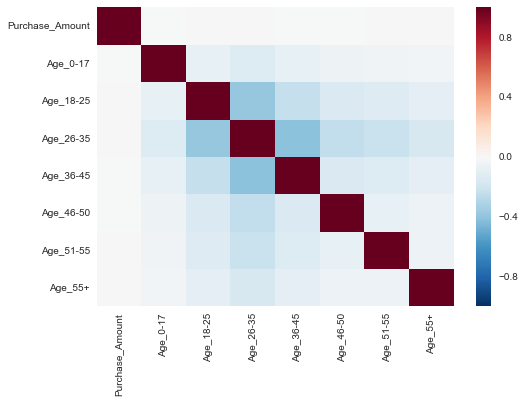

In [21]:
# Plotting a heat matrix to identify if correlation between age groups exist
plt.gcf().clear()

Corr = train2.iloc[: , [11, 14, 15, 16, 17, 18, 19, 20]].corr()
print(Corr)
sns.heatmap(Corr)
plt.show()

In [22]:
# Combining age bins based on similar statistical characteristics detected in Storytelling notebook
train2['AgeNew_0-17_55+'] = train2['Age_0-17'] + train2['Age_55+']
train2['AgeNew_26-35'] = train2['Age_26-35']
train2['AgeNew_18-25_36_45'] = train2['Age_36-45'] + train2['Age_18-25']
train2['AgeNew_51+'] = train2['Age_51-55'] + train2['Age_46-50']

# Combining age bins based on similar statistical characteristics detected in Storytelling notebook
test2['AgeNew_0-17_55+'] = test2['Age_0-17'] + test2['Age_55+']
test2['AgeNew_26-35'] = test2['Age_26-35']
test2['AgeNew_18-25_36_45'] = test2['Age_36-45'] + test2['Age_18-25']
test2['AgeNew_51+'] = test2['Age_51-55'] + test2['Age_46-50']

                 Purchase_Amount  0_Occupation  1_Occupation  2_Occupation  \
Purchase_Amount         1.000000     -0.001427     -0.008967     -0.000060   
0_Occupation           -0.001427      1.000000     -0.116946     -0.085803   
1_Occupation           -0.008967     -0.116946      1.000000     -0.069226   
2_Occupation           -0.000060     -0.085803     -0.069226      1.000000   
3_Occupation            0.001695     -0.069319     -0.055927     -0.041034   
4_Occupation            0.000821     -0.148114     -0.119500     -0.087676   
5_Occupation            0.004851     -0.057284     -0.046217     -0.033909   
6_Occupation            0.000888     -0.074632     -0.060214     -0.044178   
7_Occupation            0.001844     -0.132133     -0.106606     -0.078216   
8_Occupation           -0.002005     -0.020212     -0.016307     -0.011965   
9_Occupation            0.000523     -0.040950     -0.033039     -0.024241   
10_Occupation           0.001075     -0.059070     -0.047658    

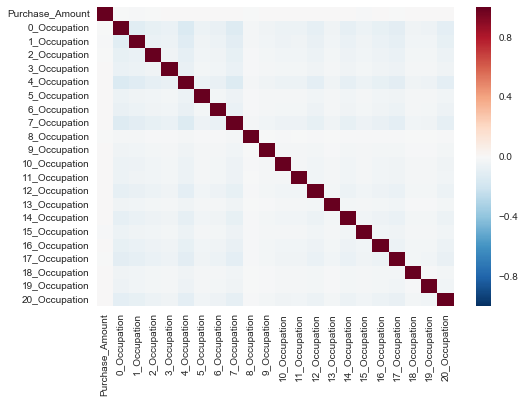

In [23]:
# Plotting a heat matrix to identify if correlation between occupation groups exist
import seaborn as sns

plt.gcf().clear()

Corr = train2.iloc[: , [11, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]].corr()
print(Corr)


sns.heatmap(Corr)
plt.show()

In [24]:
print(Corr)

                 Purchase_Amount  0_Occupation  1_Occupation  2_Occupation  \
Purchase_Amount         1.000000     -0.001427     -0.008967     -0.000060   
0_Occupation           -0.001427      1.000000     -0.116946     -0.085803   
1_Occupation           -0.008967     -0.116946      1.000000     -0.069226   
2_Occupation           -0.000060     -0.085803     -0.069226      1.000000   
3_Occupation            0.001695     -0.069319     -0.055927     -0.041034   
4_Occupation            0.000821     -0.148114     -0.119500     -0.087676   
5_Occupation            0.004851     -0.057284     -0.046217     -0.033909   
6_Occupation            0.000888     -0.074632     -0.060214     -0.044178   
7_Occupation            0.001844     -0.132133     -0.106606     -0.078216   
8_Occupation           -0.002005     -0.020212     -0.016307     -0.011965   
9_Occupation            0.000523     -0.040950     -0.033039     -0.024241   
10_Occupation           0.001075     -0.059070     -0.047658    

In [25]:
# Combining occupation bins based on similar statistical characteristics detected in Storytelling notebook
train2['OccupationNew_0-2'] = train2['0_Occupation'] + train2['1_Occupation'] + train2['2_Occupation'] 
train2['OccupationNew_3-5'] = train2['3_Occupation'] + train2['4_Occupation'] + train2['5_Occupation'] 
train2['OccupationNew_6-8'] = train2['6_Occupation'] + train2['7_Occupation'] + train2['8_Occupation'] 
train2['OccupationNew_9-11'] = train2['9_Occupation'] + train2['10_Occupation'] + train2['11_Occupation'] 
train2['OccupationNew_12-14'] = train2['12_Occupation'] + train2['13_Occupation'] + train2['14_Occupation'] 
train2['OccupationNew_15-17'] = train2['15_Occupation'] + train2['16_Occupation'] + train2['17_Occupation'] 
train2['OccupationNew_18-20'] = train2['18_Occupation'] + train2['19_Occupation'] + train2['20_Occupation'] 

# Combining occupation bins based on similar statistical characteristics detected in Storytelling notebook
test2['OccupationNew_0-2'] = test2['0_Occupation'] + test2['1_Occupation'] + test2['2_Occupation'] 
test2['OccupationNew_3-5'] = test2['3_Occupation'] + test2['4_Occupation'] + test2['5_Occupation'] 
test2['OccupationNew_6-8'] = test2['6_Occupation'] + test2['7_Occupation'] + test2['8_Occupation'] 
test2['OccupationNew_9-11'] = test2['9_Occupation'] + test2['10_Occupation'] + test2['11_Occupation'] 
test2['OccupationNew_12-14'] = test2['12_Occupation'] + test2['13_Occupation'] + test2['14_Occupation'] 
test2['OccupationNew_15-17'] = test2['15_Occupation'] + test2['16_Occupation'] + test2['17_Occupation'] 
test2['OccupationNew_18-20'] = test2['18_Occupation'] + test2['19_Occupation'] + test2['20_Occupation'] 

In [26]:
# Moves Maritual_Status to the beginning of the rest of the hot one encoded data
cols = list(train2.columns.values) #Make a list of all of the columns in the df
cols.insert(11, cols.pop(cols.index('Marital_Status')))
trainDf = train2[cols] #Create new dataframe with columns in the order you want

trainDf.to_csv('Hold/training2Df.csv', index=False)

# Moves Marital_Status to the beginning of the rest of the hot one encoded data
cols = list(test2.columns.values) #Make a list of all of the columns in the df
cols.insert(10, cols.pop(cols.index('Marital_Status')))
testDf = test2[cols] #Create new dataframe with columns in the order you want

testDf.to_csv('Hold/test2Df.csv', index=False)